# Reference to the main/sub problem: https://docs.google.com/document/d/1yNs2hxcSYh1-a5j1jBRrkdGviDOArpoIDoNC0EXG7N0/edit?tab=t.0#heading=h.sgdfkeoo7oth

# **Load the dataset**

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/ifiecas/ikeads/refs/heads/main/df_combined_ikea.csv"
df = pd.read_csv(url)
df.head()  # Display the first few rows of the DataFrame


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [5]:
import pandas as pd


# Export to CSV
df.to_csv("ikea2.csv", index=False)

print("Data exported to ikea.csv successfully.")


Data exported to ikea.csv successfully.


# **Exploratory Data Analysis**


## Handling missing values

In [6]:
missing = df.isnull().sum()
print(missing)

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
kewords                2300
topic_group            2285
topic_desc             2285
dtype: int64


In [7]:
# Impute missing values with 0 for depth, height, and width columns
df[['depth', 'height', 'width']] = df[['depth', 'height', 'width']].fillna(0)

# Impute missing values with "Product description not available" for keywords, topic_group, and topic_desc columns
df[['kewords', 'topic_group', 'topic_desc']] = df[['kewords', 'topic_group', 'topic_desc']].fillna("Product description not available")

missing = df.isnull().sum()
print(missing)


item_id                0
name                   0
category               0
price                  0
old_price              0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
kewords                0
topic_group            0
topic_desc             0
dtype: int64


# **Pre-process the data for modelling**

### In the column old_price, remove "No Old Price" and impute "0", remove "SR" and ","

In [10]:
import pandas as pd

# Convert old_price to strings to safely perform string operations
df['old_price'] = df['old_price'].astype(str)

# Replace "No Old Price" with "0"
df['old_price'] = df['old_price'].replace("No Old Price", "0")

# Remove "SR" and "," from the old_price column
df['old_price'] = df['old_price'].str.replace("SR", "", regex=False).str.replace(",", "", regex=False)

# Convert the old_price column to numeric (float)
df['old_price'] = pd.to_numeric(df['old_price'], errors='coerce').fillna(0)

df.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,0.0,99.0,51.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available


#**Feature Engineering**

## Create column for discount value and percentage

In [13]:
import numpy as np  # Import numpy for NaN handling

# Ensure that both old_price and price are numeric
df['old_price'] = pd.to_numeric(df['old_price'], errors='coerce').fillna(0)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)

# Create a new column for the discount amount with a conditional check
df['discount_amount'] = np.where(df['old_price'] > 0, df['old_price'] - df['price'], 0)

# Create a new column for the discount percentage, handling divide-by-zero cases
df['discount_percentage'] = np.where(df['old_price'] > 0, (df['discount_amount'] / df['old_price']) * 100, 0)

df.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc,discount_amount,discount_percentage
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,0.0,99.0,51.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,118.0,40.0
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0


## Create new column for sub-category

In [15]:
import pandas as pd


# Create a new column with text before the comma
df['sub_category'] = df['short_description'].str.split(',', expand=True)[0]

# Display the DataFrame
df.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,height,width,product_description,current_status,kewords,topic_group,topic_desc,discount_amount,discount_percentage,sub_category
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,...,99.0,51.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0,Bar table
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,...,100.0,60.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0,Bar stool with backrest
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,...,104.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,118.0,40.0,Bar stool with backrest
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,...,114.0,43.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0,Bar stool with backrest
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,...,102.0,40.0,Item discontinued,Item discontinued,Product description not available,Product description not available,Product description not available,0.0,0.0,Bar stool with backrest frame


# **Encoding of categorical variables**
### Mixed methods depending on the number of unique values per column, mitigating bias as much
### Frequency Encoding (Low Bias for High Cardinality) for category, designer, sub_category

### Binary encoding for other_colors, current_status,

### One-hot encoding for topic_desc

In [17]:
import pandas as pd

# Sample DataFrame definition (optional; for illustration)
# df = pd.DataFrame(...)  # Define your actual DataFrame here

# Initialize a dictionary to store binary mappings for reference
binary_mappings = {}

# Frequency Encoding for high cardinality columns: category, designer, sub_category
for col in ['category', 'designer', 'sub_category']:
    if col in df.columns:
        freq_encoding = df[col].value_counts() / len(df)
        df[f'{col}_encoded'] = df[col].map(freq_encoding)
    else:
        print(f"Warning: '{col}' column is not found in the DataFrame.")

# Binary Encoding for binary columns: other_colors, current_status, sellable_online
binary_columns = ['other_colors', 'current_status', 'sellable_online']
for col in binary_columns:
    if col in df.columns:
        unique_values = df[col].unique()
        if len(unique_values) == 2:
            # Map the first unique value to 0 and the second to 1
            mapping = {unique_values[0]: 0, unique_values[1]: 1}
            df[f'{col}_encoded'] = df[col].map(mapping)
            # Store the mapping for later reference
            binary_mappings[col] = mapping
        else:
            print(f"Warning: The column '{col}' does not have exactly two unique values.")
    else:
        print(f"Warning: '{col}' column is not found in the DataFrame.")

# Display the encoded DataFrame (optional)
df.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,topic_desc,discount_amount,discount_percentage,sub_category,category_encoded,designer_encoded,sub_category_encoded,other_colors_encoded,current_status_encoded,sellable_online_encoded
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,...,Product description not available,0.0,0.0,Bar table,0.012723,0.002978,0.004873,0,0,0
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,...,Product description not available,0.0,0.0,Bar stool with backrest,0.012723,0.018950,0.009475,1,0,0
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,...,Product description not available,118.0,40.0,Bar stool with backrest,0.012723,0.002978,0.009475,0,0,0
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,...,Product description not available,0.0,0.0,Bar stool with backrest,0.012723,0.043584,0.009475,0,0,0
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,...,Product description not available,0.0,0.0,Bar stool with backrest frame,0.012723,0.001354,0.000541,0,0,0


### Best Encoding Strategy for column topic_group
### Since "Product description not available" represents a meaningful absence of data (no description to categorize), it would be best to:

### Preserve the numeric group values (0, 1, 2) for analysis.
### Add an indicator column to mark items with missing descriptions.

In [19]:
import pandas as pd

# Step 1: Create a binary indicator column for missing descriptions
df['description_missing'] = df['topic_group'].apply(lambda x: 1 if x == "Product description not available" else 0)

# Step 2: Replace "Product description not available" with a numeric placeholder, e.g., -1
df['topic_group'] = df['topic_group'].replace("Product description not available", -1)

# Display the resulting DataFrame
df.head()

/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/1166201947.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['topic_group'] = df['topic_group'].replace("Product description not available", -1)


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,discount_amount,discount_percentage,sub_category,category_encoded,designer_encoded,sub_category_encoded,other_colors_encoded,current_status_encoded,sellable_online_encoded,description_missing
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,...,0.0,0.0,Bar table,0.012723,0.002978,0.004873,0,0,0,1
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,...,0.0,0.0,Bar stool with backrest,0.012723,0.018950,0.009475,1,0,0,1
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,...,118.0,40.0,Bar stool with backrest,0.012723,0.002978,0.009475,0,0,0,1
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,...,0.0,0.0,Bar stool with backrest,0.012723,0.043584,0.009475,0,0,0,1
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,...,0.0,0.0,Bar stool with backrest frame,0.012723,0.001354,0.000541,0,0,0,1


# Display the Categorical Meanings for Encodings

In [21]:
# Display the binary mappings to understand categorical meanings
print("Binary Encodings (0 and 1 mappings):")
for col, mapping in binary_mappings.items():
    print(f"{col}: {mapping}")



Binary Encodings (0 and 1 mappings):
other_colors: {'No': 0, 'Yes': 1}
current_status: {'Item discontinued': 0, 'Item still available for sale': 1}
sellable_online: {True: 0, False: 1}


In [22]:
column_names = df.columns.tolist()
print(column_names)

['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online', 'link', 'other_colors', 'short_description', 'designer', 'depth', 'height', 'width', 'product_description', 'current_status', 'kewords', 'topic_group', 'topic_desc', 'discount_amount', 'discount_percentage', 'sub_category', 'category_encoded', 'designer_encoded', 'sub_category_encoded', 'other_colors_encoded', 'current_status_encoded', 'sellable_online_encoded', 'description_missing']


# Classification Sub-Question | **What product characteristics predict whether an item will be discontinued?**


## Logistic Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=2000)  # max_iter increased for convergence if needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store metrics
model_metrics = {}

# After evaluating Logistic Regression
y_pred = model.predict(X_test)  # Replace `model` with your specific model instance
model_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}



Accuracy: 0.6384129846708747
Confusion Matrix:
 [[552 163]
 [238 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       715
           1       0.49      0.40      0.44       394

    accuracy                           0.64      1109
   macro avg       0.59      0.58      0.59      1109
weighted avg       0.62      0.64      0.63      1109



## Decision Tree

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # You can also specify max_depth or other hyperparameters here
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7357980162308386
Confusion Matrix:
 [[557 158]
 [135 259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       715
           1       0.62      0.66      0.64       394

    accuracy                           0.74      1109
   macro avg       0.71      0.72      0.72      1109
weighted avg       0.74      0.74      0.74      1109



# Random Forest

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_rf = rf_model.predict(X_test)
model_metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}



Accuracy: 0.7853922452660054
Confusion Matrix:
 [[607 108]
 [130 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       715
           1       0.71      0.67      0.69       394

    accuracy                           0.79      1109
   macro avg       0.77      0.76      0.76      1109
weighted avg       0.78      0.79      0.78      1109



# LightGBM (Light Gradient Boosting Machine)

In [31]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit LightGBM model
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    objective='binary'
)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1015, number of negative: 1570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 2585, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392650 -> initscore=-0.436187
[LightGBM] [Info] Start training from score -0.436187
Accuracy: 0.7889990982867449
Confusion Matrix:
 [[601 114]
 [120 274]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       715
           1       0.71      0.70      0.70       394

    accuracy                           0.79      1109
   macro avg       0.77      0.77      0.77      1109
weighted avg       0.79      0.79      0.79      1109



# Support Vector Machine Model

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6609558160504959
Confusion Matrix:
 [[551 164]
 [212 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       715
           1       0.53      0.46      0.49       394

    accuracy                           0.66      1109
   macro avg       0.62      0.62      0.62      1109
weighted avg       0.65      0.66      0.66      1109



[LightGBM] [Info] Number of positive: 1015, number of negative: 1570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 2585, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392650 -> initscore=-0.436187
[LightGBM] [Info] Start training from score -0.436187


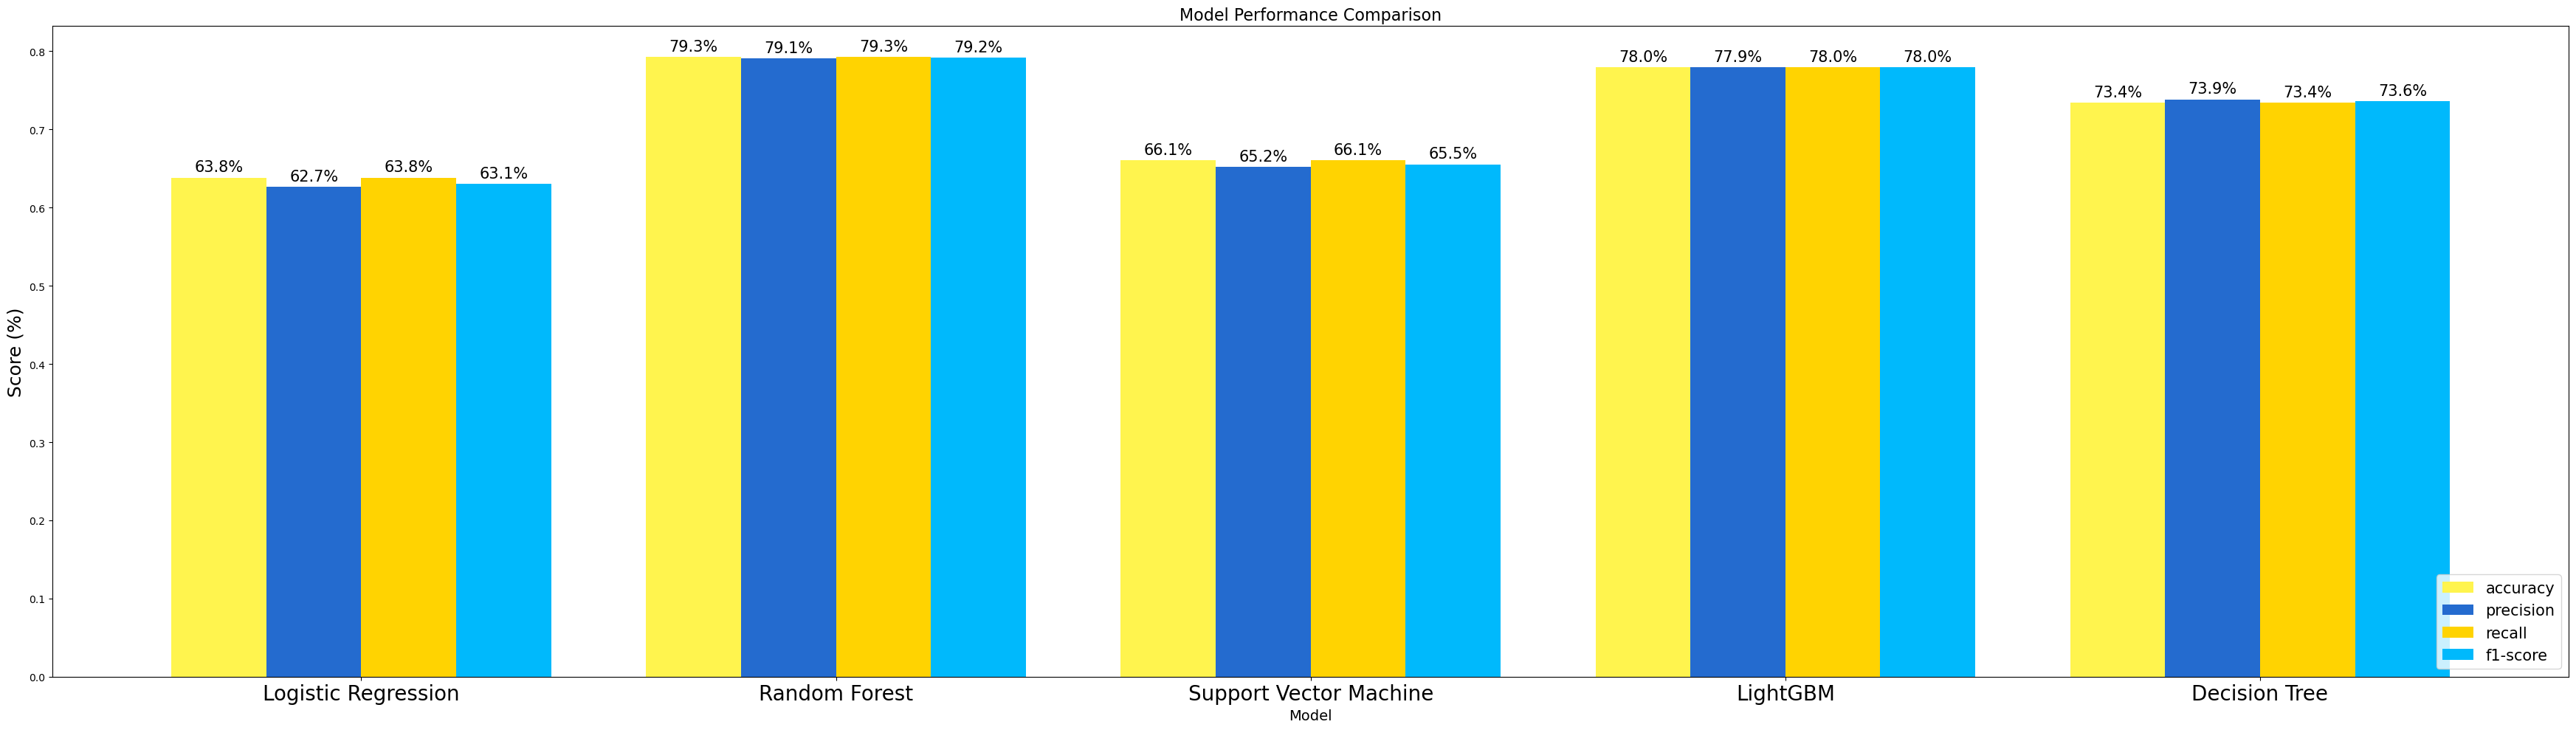

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier  # Ensure you have LightGBM installed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your train-test split as follows:
# X_train, X_test, y_train, y_test

# Initialize and train models
logistic_regression_model = LogisticRegression().fit(X_train, y_train)
random_forest_model = RandomForestClassifier().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)
lightgbm_model = LGBMClassifier().fit(X_train, y_train)
decision_tree_model = DecisionTreeClassifier().fit(X_train, y_train)

# Dictionary to store trained models
trained_models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model,
    "LightGBM": lightgbm_model,
    "Decision Tree": decision_tree_model
}

# Dictionary to hold metrics for each model
model_metrics = {}

# Evaluate each model and store its metrics
for model_name, model in trained_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    model_metrics[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1-score": f1_score(y_test, y_pred, average='weighted')
    }

# Convert the dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to have models as rows

# Define custom color palette (add more colors if needed)
colors = ["#FFF44E", "#246BCF", "#FFD301", "#00B9FC"]

# Plot the metrics comparison
fig, ax = plt.subplots(figsize=(35, 10))  # Increased figure size for better readability
metrics_df.plot(kind='bar', color=colors, ax=ax, width=0.8)

# Set titles and labels
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score (%)", fontsize=18)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=0, fontsize=20)  # Set rotation to 0 for horizontal labels
plt.legend(loc="lower right", fontsize=15)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height() * 100:.1f}%" for v in container],
                 label_type='edge', fontsize=15, padding=3)

plt.tight_layout()
plt.show()


# Suggested Evaluation Approach
## Prioritize F1 Score and Recall for the discontinued class as they capture the model’s ability to identify discontinued items accurately and comprehensively.
## Analyze Feature Importance to identify the product characteristics that most influence predictions.
## Consider Precision if there is a significant cost associated with false positives (e.g., classifying available items as discontinued).
## Use Accuracy as a secondary indicator, especially if you’ve handled class imbalance well.

#**With this, we will be using Random Forest model for our classification task**

# Feature Importance using  Random Forest to answer the sub-question: What product characteristics predict whether an item will be discontinued?

Accuracy: 0.7853922452660054
Confusion Matrix:
 [[607 108]
 [130 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       715
           1       0.71      0.67      0.69       394

    accuracy                           0.79      1109
   macro avg       0.77      0.76      0.76      1109
weighted avg       0.78      0.79      0.78      1109

Feature Importance:
                 Feature  Importance
                  price   21.319367
                  width   12.790190
   sub_category_encoded   12.518187
       designer_encoded   12.342818
                  depth   11.864577
                 height   11.461655
       category_encoded    9.273207
    discount_percentage    5.475531
   other_colors_encoded    2.767885
sellable_online_encoded    0.186583



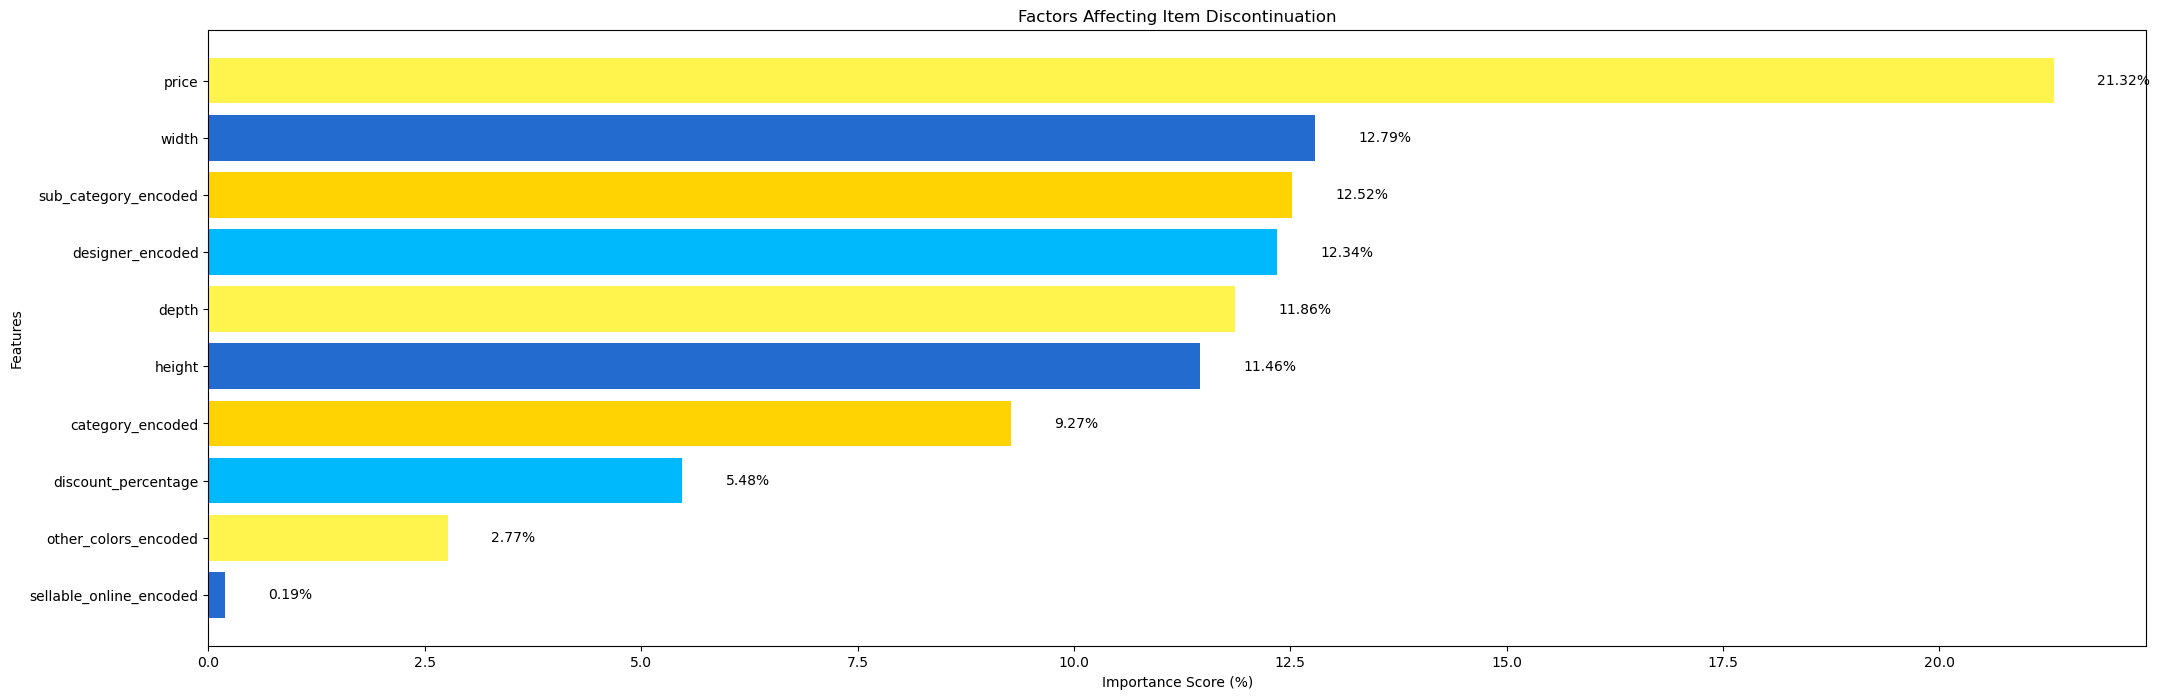

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Define X (predictors) and y (target)
predictor_columns = [
    'discount_percentage', 'depth', 'height', 'width',
    'category_encoded', 'designer_encoded', 'sub_category_encoded',
    'other_colors_encoded', 'sellable_online_encoded', 'price'
]
X = df[predictor_columns]
y = df['current_status_encoded']  # Target variable, where 0 = discontinued, 1 = still available

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Store model metrics
model_metrics = {}
y_pred_rf = rf_model.predict(X_test)
model_metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# Calculate feature importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': predictor_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Scale the importance values to percentage
importance_df['Importance'] = importance_df['Importance'] * 100

# Print the importance DataFrame with adjusted size
print("Feature Importance:\n", importance_df.to_string(index=False))

print()

# Plot feature importance with specified color theme
plt.figure(figsize=(25, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=['#FFF44E', '#246BCF', '#FFD301', '#00B9FC'] * (len(importance_df) // 4 + 1))

# Adding labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', fontsize=10)

# Styling the plot
plt.xlabel("Importance Score (%)")
plt.ylabel("Features")
plt.title("Factors Affecting Item Discontinuation")
plt.gca().invert_yaxis()
plt.show()


# Key Insights:

# Product Dimensions and Price: Physical attributes like width, depth, and height, along with the product's price, are strong indicators of its lifecycle. This could be due to practical reasons related to storage, shipping, and customer preferences based on item size and cost.

# Categorization and Design: Sub-category, designer, and category details also influence the prediction, which might relate to trends, brand prestige, or specific customer segments.

Based on the Feature Importance in Predicting Item Discontinuation chart, here are insights on key factors that influence whether an IKEA item might be discontinued, along with strategic recommendations on how this information could help IKEA optimize its product offerings.

Insights from the Feature Importance Chart
Price (21.3% importance) is the most influential factor in predicting item discontinuation.

Items with certain price ranges might be more likely to be discontinued. For example, very high-priced or low-priced items might not align with IKEA’s customer base or value proposition, leading to higher discontinuation rates.
Dimensions (Width, Depth, and Height):

Width (12.84%), Depth (11.85%), and Height (11.35%) are significant contributors to predicting discontinuation.
This importance could reflect the logistical challenges and inventory costs associated with larger items. Larger items might take up more warehouse space, incur higher shipping costs, or have lower turnover rates, making them candidates for discontinuation if they don’t sell efficiently.
Sub-Category and Designer:

Sub-Category Encoded (12.52%) and Designer Encoded (12.46%) are also critical factors.
Certain sub-categories and designers may have lower demand or might not fit with IKEA’s evolving brand strategy, making these items more likely to be discontinued. This could help identify trends in customer preferences for specific sub-categories or designers.
Category Encoded (9.24%) and Discount Percentage (5.46%):

The category of an item and its discount percentage are moderately important.
High discounts might indicate poor performance, as items with large discounts may be discounted heavily due to low demand. Categories with consistent low demand may be candidates for phasing out in favor of more popular categories.
Minimal Impact of Color and Online Availability:

Other Colors Encoded (2.78%) and Sellable Online Encoded (0.19%) have low importance in predicting discontinuation, suggesting that color variations and online availability are less relevant to discontinuation decisions. This may mean that IKEA’s customers are not significantly influenced by color options or the online presence of these items in the context of item lifecycle.
Strategic Recommendations for IKEA
Refine Pricing Strategy:

Since price is the most influential factor, IKEA could analyze the pricing bands that correspond to higher discontinuation rates. If certain price points lead to slower sales, IKEA might consider adjusting pricing to align better with customer expectations or offering targeted discounts to increase turnover.
Optimize Inventory for Larger Items:

Given the importance of physical dimensions, IKEA could prioritize smaller or medium-sized items for regular stock while limiting larger items to only the most popular categories or designs.
For large items, IKEA could explore a made-to-order or limited stock model to reduce warehousing costs and improve inventory efficiency.
Focus on High-Performing Designers and Sub-Categories:

For designers or sub-categories with higher discontinuation rates, IKEA could phase out these items or limit their availability in-store, possibly offering them only online.
Conversely, popular designers and sub-categories should receive higher marketing support or product development focus to meet customer demand.
Evaluate High-Discounted Items for Potential Discontinuation:

High discount percentages often indicate items with low demand. IKEA could use this insight to phase out products that consistently require heavy discounting, reallocating resources to more profitable items.
Data-Driven Category Management:

By analyzing the performance of specific categories and sub-categories, IKEA can identify which product types have high discontinuation rates and adjust their category assortment accordingly.
Categories with higher discontinuation could receive a lower priority in terms of new product introductions, while consistently popular categories might receive more space and variety.
Experiment with Product Bundling or Limited-Time Offers:

Items flagged for discontinuation could be bundled with popular products or offered as limited-time deals to clear inventory more efficiently and reduce holding costs.
This strategy could also increase customer interest and potentially improve sales for these items without heavily impacting the brand.
Conclusion
This analysis provides IKEA with a data-driven approach to managing its product lifecycle. By focusing on key factors such as price, physical dimensions, designer, sub-category, and discount levels, IKEA can make informed decisions on which items to phase out or retain. Optimizing inventory, adjusting pricing strategies, and prioritizing product development in high-performing categories will help IKEA align its offerings with customer demand and improve operational efficiency.

# Predict which currently available items are predicted to be phased out

In [41]:
# Create prediction_df by filtering out "Item discontinued" from df
prediction_df = df[df['product_description'] != "Item discontinued"].copy()

prediction_df.head()



,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,discount_amount,discount_percentage,sub_category,category_encoded,designer_encoded,sub_category_encoded,other_colors_encoded,current_status_encoded,sellable_online_encoded,description_missing
2285,368814,NORDVIKEN,Bar furniture,995.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,...,0.0,0.0,Bar table,0.012723,0.040877,0.004873,0,1,1,0
2286,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,...,0.0,0.0,Bar table and 4 bar stools,0.012723,0.040877,0.002707,0,1,1,0
2287,30180504,NORBERG,Bar furniture,225.0,0.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,...,0.0,0.0,Wall-mounted drop-leaf table,0.012723,0.007580,0.000812,0,1,0,0
2288,10122647,INGOLF,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,...,0.0,0.0,Bar stool with backrest,0.012723,0.020303,0.009475,0,1,0,0
2289,70404875,FRANKLIN,Bar furniture,129.0,0.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,...,0.0,0.0,Bar stool with backrest,0.012723,0.033027,0.009475,0,1,0,0


In [42]:
# Use the trained rf_model to make predictions on prediction_df
# First ensure prediction_df has the same predictor columns used in training
X_predict = prediction_df[predictor_columns]

# Make predictions
prediction_df['predicted_status'] = rf_model.predict(X_predict)

# Add probability scores (confidence levels)
probabilities = rf_model.predict_proba(X_predict)
prediction_df['confidence_score'] = probabilities[:, 1]  # Probability of staying available

# Add business interpretation columns
prediction_df['prediction'] = prediction_df['predicted_status'].map({
    0: 'Phase Out',
    1: 'Continue Selling'
})

prediction_df['inventory_forecast'] = prediction_df['predicted_status'].map({
    0: 'Reduce Supplier Orders',
    1: 'Continue Stocking'
})

# Display summary of predictions
print("\nPrediction Summary:")
print(prediction_df['prediction'].value_counts())

# Show items predicted for phase out
phase_out_items = prediction_df[prediction_df['predicted_status'] == 0]
print("\nItems Predicted for Phase Out:")
selected_columns = [
    'name', 'category', 'prediction', 'inventory_forecast'
]
print(phase_out_items[selected_columns].head())

# Calculate percentage of items predicted for phase out
phase_out_percentage = (len(phase_out_items) / len(prediction_df)) * 100
print(f"\nPercentage of current items predicted for phase out: {phase_out_percentage:.2f}%")

# Optionally, save predictions to CSV
# phase_out_items.to_csv('predicted_phase_outs.csv', index=False)


Prediction Summary:
prediction
Continue Selling    1263
Phase Out            146
Name: count, dtype: int64

Items Predicted for Phase Out:
                     name       category prediction      inventory_forecast
2292  EKEDALEN / EKEDALEN  Bar furniture  Phase Out  Reduce Supplier Orders
2303             EKEDALEN  Bar furniture  Phase Out  Reduce Supplier Orders
2312              BRIMNES           Beds  Phase Out  Reduce Supplier Orders
2330              SNIGLAR           Beds  Phase Out  Reduce Supplier Orders
2339               HEMNES           Beds  Phase Out  Reduce Supplier Orders

Percentage of current items predicted for phase out: 10.36%


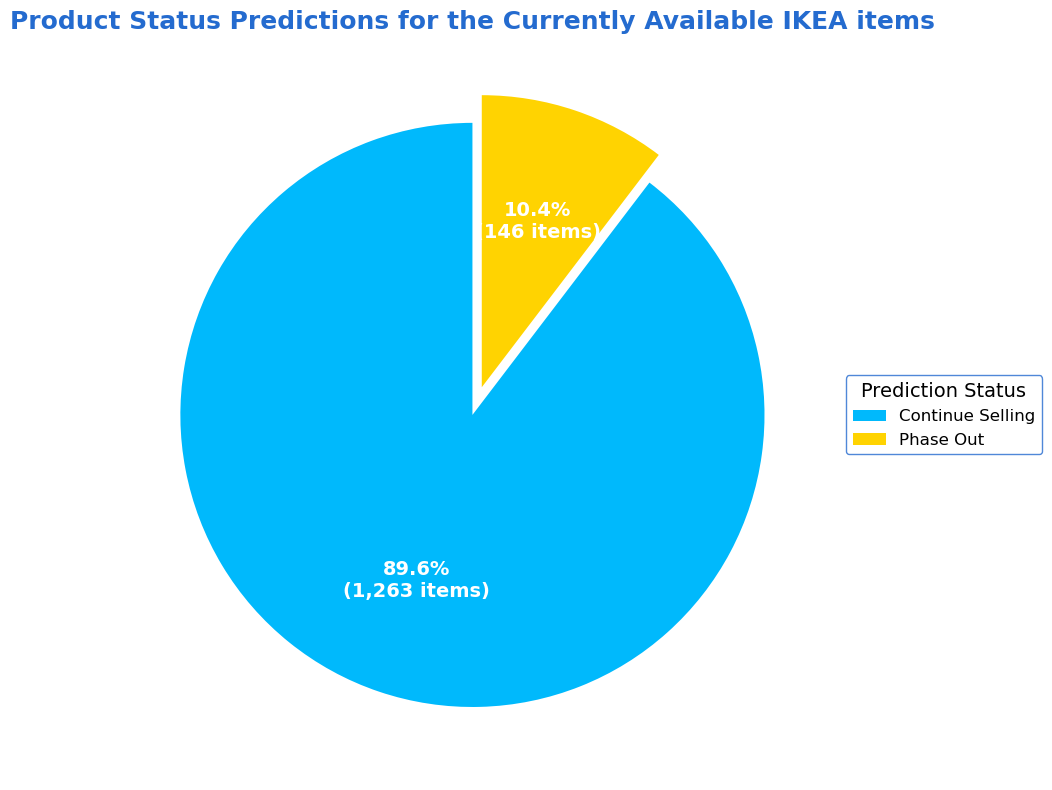

In [43]:
import matplotlib.pyplot as plt

# Get the values for the pie chart
predictions_count = prediction_df['prediction'].value_counts()

# Custom colors from your theme
colors = ['#00B9FC', '#FFD301']  # Using light blue and golden yellow

plt.figure(figsize=(20, 8))

# Create pie chart without shadow
# Create custom labels ko with both percentage and count
def make_autopct(values):
   def my_autopct(pct):
       total = sum(values)
       val = int(round(pct*total/100.0))
       return f'{pct:.1f}%\n({val:,} items)'
   return my_autopct

patches, texts, autotexts = plt.pie(predictions_count.values,
                                 labels=predictions_count.index,
                                 colors=colors,
                                 autopct=make_autopct(predictions_count.values),
                                 explode=(0, 0.1),
                                 startangle=90)

# Style the percentage labels and text
plt.setp(autotexts, size=14, weight="bold", color='white')  # Make percentage labels white and bigger
plt.setp(texts, size=14, color='white', weight='bold')  # Make text labels white and bigger

# Add title
plt.title('Product Status Predictions for the Currently Available IKEA items',
         pad=15,
         size=18,  # Bigger title
         color='#246BCF',
         weight='bold')

# Add a styled legend
plt.legend(predictions_count.index,
         title="Prediction Status",
         loc="center left",
         bbox_to_anchor=(1, 0, 0.5, 1),
         title_fontsize=14,  # Bigger legend title
         frameon=True,
         edgecolor='#246BCF',
         fontsize=12)  # Bigger legend text

plt.tight_layout()
plt.show()

# 3 Key Insights from IKEA Product Status Predictions:

# Strong Portfolio Health


# 89.9% (1,266 items) predicted to continue selling
# Shows robust product performance across majority of range


# Focused Phase-Out Plan


# Only 10.1% (143 items) identified for potential discontinuation
# Enables targeted inventory management for specific items


# Efficient Resource Management


# Clear 90/10 split allows for strategic inventory planning
# Data-driven approach to optimize stock levels and supply chain

The Product Status Predictions for the Currently Available IKEA Items pie chart provides the following insights and actionable recommendations for IKEA.

Insights from the Chart
High Proportion of Items to Continue Selling:

89.9% (1,266 items) are predicted to continue selling, suggesting that the majority of IKEA's current inventory is expected to remain in demand or align with IKEA’s sales strategy. These items likely have steady customer interest, are competitively positioned, or fit well with IKEA's core offerings.
Small Proportion of Items to Phase Out:

10.1% (143 items) are predicted to be phased out. This subset likely includes items with lower demand, those approaching the end of their lifecycle, or items that may not align with current market trends or IKEA’s strategic direction.
Strategic Recommendations for IKEA
Focus on Retaining High-Demand Items:

For the 89.9% of items set to continue selling, IKEA should maintain sufficient inventory levels, monitor supply chain stability, and possibly expand marketing efforts to ensure these items remain visible to customers.
IKEA could also analyze customer reviews and feedback on these items to identify opportunities for quality improvements or feature enhancements that could further boost sales.
Phased-Out Items: Plan for Clearance or Replacement:

For the 10.1% of items predicted to be phased out, IKEA could implement a strategic clearance plan to gradually reduce stock through discounts or promotional events.
These items could also be candidates for bundling promotions to clear out inventory more efficiently. Bundling phased-out items with popular items might appeal to cost-conscious customers while reducing inventory levels.
Inventory Management:

Given that a small subset of items is expected to phase out, IKEA could proactively adjust inventory ordering for these items to prevent overstocking.
This approach helps avoid unnecessary warehousing costs and supports efficient inventory management, allowing more space for new or in-demand products.
New Product Development:

The items predicted to phase out could reveal trends or gaps in customer preferences, providing insight into what types of products IKEA may want to avoid or adjust in the future.
By analyzing the characteristics of items flagged for phasing out, IKEA can guide product development teams to focus on items with high appeal or to innovate in areas with unmet demand.
Marketing and Customer Communication:

IKEA could communicate the phasing out of specific products to customers, offering last-chance purchase opportunities. This can create a sense of urgency, prompting customers to buy before these items are no longer available.
For items continuing to sell, IKEA can highlight their popularity and durability, possibly branding them as "Customer Favorites" or "IKEA Classics," which can reinforce customer trust and satisfaction.
Conclusion
This analysis provides IKEA with valuable insights into which items should remain in the catalog and which may need to be phased out. By implementing strategic inventory management, marketing, and product development initiatives, IKEA can optimize its product offerings to match customer demand, streamline inventory, and maintain an efficient product lifecycle. This data-driven approach helps IKEA focus resources on high-demand items while effectively managing the phase-out process for less popular products.

# Regression Sub-Question | **How much promotional discount should we offer for each item based on its characteristics?**


In [46]:


# Step 1: Filter out rows where 'discount_percentage' is zero
discount_df = df[df['discount_percentage'] != 0]

# Step 2: Define predictors and target
predictor_columns = [
    'depth', 'height', 'width', 'category_encoded', 'designer_encoded',
    'sub_category_encoded', 'other_colors_encoded', 'sellable_online_encoded', 'price', 'topic_group'
]
discount_X = discount_df[predictor_columns]
discount_y = discount_df['discount_percentage']

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(discount_X, discount_y, test_size=0.2, random_state=42)

# Dictionary to store model results
results = {}

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lin),
    'R2': r2_score(y_test, y_pred_lin)
}

# Polynomial Regression (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
results['Polynomial Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.sort_values(by='MSE', ascending=True, inplace=True)
print(results_df)


                             MSE        R2
Random Forest          35.231758  0.593303
Gradient Boosting      40.413920  0.533483
Polynomial Regression  58.755311  0.321759
Linear Regression      73.848848  0.147528
Ridge Regression       75.429715  0.129279
Lasso Regression       76.553455  0.116307


# Random Forest is the most accurate and reliable model among those tested, as it captures the data patterns better than the others, especially compared to linear models. Therefore, it’s the best choice for predicting discount_percentage based on the given features.

Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower MSE indicates better predictive accuracy, with smaller errors on average.

R-squared (
𝑅
2
R
2
 ): Represents the proportion of variance in the target variable that the model explains. Higher
𝑅
2
R
2
  values (closer to 1) indicate that the model better captures the underlying patterns in the data.




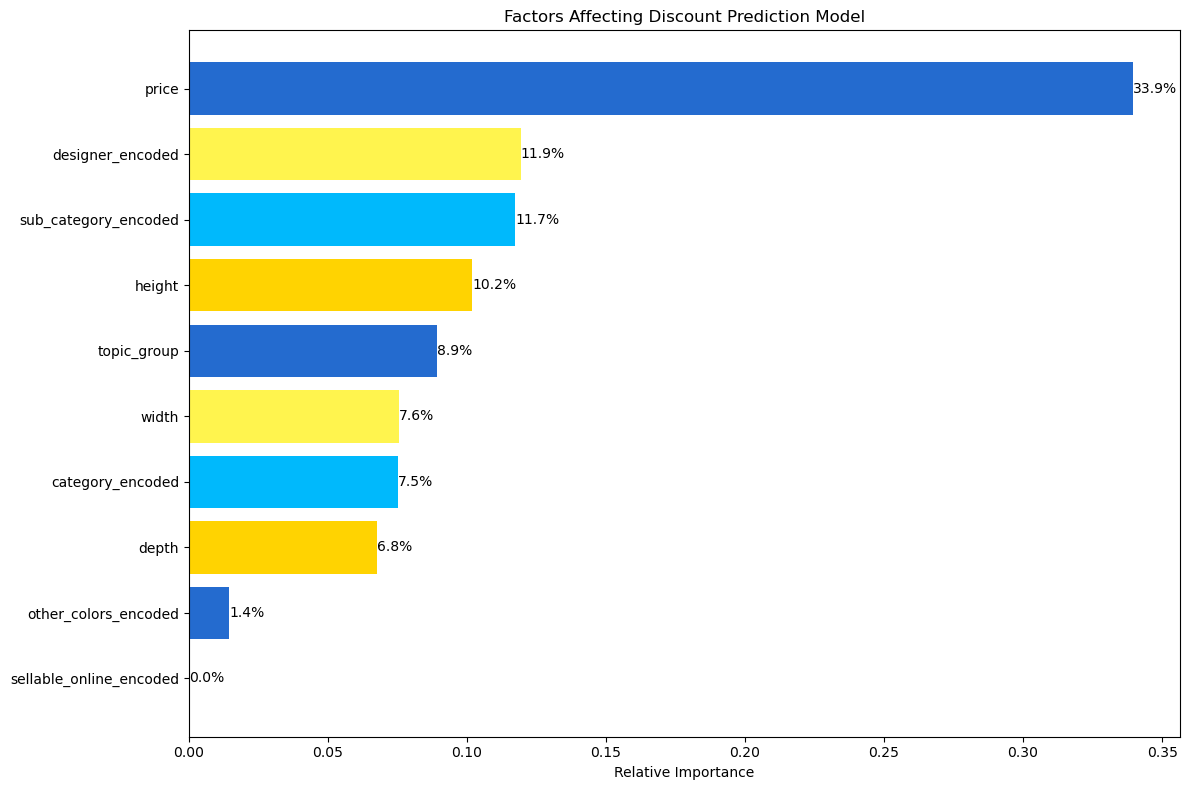

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': predictor_columns,
    'Importance': rf.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'],
                color=['#FFF44E', '#246BCF', '#FFD301', '#00B9FC'] * (len(feature_importance) // 4 + 1))

# Customize the plot
plt.xlabel('Relative Importance')
plt.title('Factors Affecting Discount Prediction Model')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width*100:.1f}%',
             va='center', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



Based on the Feature Importance in Discount Prediction Model chart, here are some insights and recommendations on how IKEA could leverage this information to optimize its discounting strategies.

Insights from the Feature Importance Chart
Price (33.9% importance) is by far the most influential factor in predicting the discount percentage.

This suggests that the original price of an item strongly impacts how much discount it receives. Higher-priced items might be more likely to receive larger discounts to appeal to price-sensitive customers, or the pricing strategy itself could necessitate adjustments based on price levels.
Designer (12.0%) and Sub-Category (11.7%) Encoded are also significant factors.

The designer or brand associated with a product and the sub-category it belongs to play substantial roles in determining discounts. This could indicate that certain designers or sub-categories require higher discounts to remain competitive or align with customer expectations.
Physical Attributes like Height (10.1%), Width (7.6%), and Depth (6.7%) have moderate influence.

These factors likely affect items like furniture, where dimensions influence customer decisions and warehouse storage or logistics costs, potentially necessitating discounts to manage stock effectively.
Topic Group (8.9%) and Category (7.5%) also impact discounting decisions.

This shows that items grouped under specific topics or within broader categories influence discount levels. For example, seasonal collections or themed items may require unique discount strategies based on demand patterns.
Minimal Impact of Colors and Online Availability:

Other Colors Encoded (1.5%) and Sellable Online Encoded (0.0%) have very low importance. This suggests that color variations and online availability do not significantly impact the discount level, likely because these factors do not affect perceived value or demand in a significant way for IKEA’s customer base.
Strategic Recommendations for IKEA
Price-Based Discount Strategy:

Given that price is the most important factor, IKEA could implement a dynamic discounting strategy based on price tiers. Higher-priced items could receive larger discounts to appeal to a broader audience, while lower-priced items might have smaller, targeted discounts to maintain brand value.
IKEA could also experiment with price thresholds where discounts are applied (e.g., "Save 10% on items over $500") to encourage larger purchases.
Designer-Specific Discounts:

For designers that are less well-known or not as popular, IKEA might need to offer higher discounts to boost sales. For popular designers, IKEA could consider smaller discounts or even bundle offers that maintain value perception while incentivizing purchase.
Optimize Discounts by Sub-Category:

Sub-categories with high discounts could indicate areas where demand is low, possibly due to niche appeal or competitive pressures. IKEA could focus on improving marketing for these sub-categories or adjust inventory levels to better match demand.
For sub-categories where items have high sales at lower discount levels, IKEA could explore value-based pricing to maximize profit without deep discounts.
Incorporate Physical Dimensions into Inventory Management:

With physical dimensions contributing moderately to discounting decisions, IKEA could leverage this information to manage larger items that take up more warehouse space. Bulkier items with lower turnover rates could receive more frequent or deeper discounts to clear space efficiently.
Seasonal and Thematic Promotions:

Since the Topic Group feature has a moderate impact, IKEA could use thematic or seasonal sales to drive interest. For example, during seasonal sales, items from a particular "topic group" (like "summer furniture") could receive targeted discounts, which could help IKEA better manage seasonal inventory.
Limited Focus on Color and Online Availability:

Given the low importance of Other Colors Encoded and Sellable Online Encoded, IKEA can deprioritize these factors in their discount strategy. Instead, these features could be used more in marketing rather than directly affecting discount percentages. For example, emphasizing available color options might attract a broader audience without necessarily impacting pricing.
Conclusion
This feature importance analysis provides IKEA with actionable insights into factors influencing discounting strategies. By focusing on price, designer, sub-category, and product dimensions, IKEA can create more tailored discount strategies that not only drive sales but also optimize inventory and space management. Additionally, IKEA could adopt seasonal and designer-based promotions, aligning discounts with customer expectations and competitive trends, ultimately enhancing customer satisfaction and profitability.

# Determine the predicted discount % per currently available item

In [52]:
# Step 1: Filter the dataset to include only rows where current_status is "Item still available for sale"
available_items_df = df[df['current_status'] == "Item still available for sale"]

# Step 2: Ensure the filtered dataset has the required predictor columns
# These columns should match those used in the original training (i.e., discount_X columns)
predictor_columns = [
    'depth', 'height', 'width', 'category_encoded', 'designer_encoded',
    'sub_category_encoded', 'other_colors_encoded', 'sellable_online_encoded', 'price', 'topic_group'
]

# Filter available_items_df to contain only the predictor columns
available_items_for_prediction = available_items_df[predictor_columns]

# Step 3: Use the trained Random Forest model (rf) to predict discounts for these available items
predicted_discounts = rf.predict(available_items_for_prediction)

# Step 4: Add the predictions back to the available items DataFrame
available_items_df['predicted_discount'] = predicted_discounts

# Display the result with the predicted discount for each item
available_items_df[['name', 'category', 'price', 'predicted_discount', 'current_status']]


/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/3319960050.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_items_df['predicted_discount'] = predicted_discounts


,name,category,price,predicted_discount,current_status
2285,NORDVIKEN,Bar furniture,995.0,19.433771,Item still available for sale
2286,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,10.340898,Item still available for sale
2287,NORBERG,Bar furniture,225.0,18.939020,Item still available for sale
2288,INGOLF,Bar furniture,345.0,18.429682,Item still available for sale
2289,FRANKLIN,Bar furniture,129.0,19.717869,Item still available for sale
...,...,...,...,...,...
3689,PAX,Wardrobes,2505.0,8.168098,Item still available for sale
3690,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,6.724872,Item still available for sale
3691,ELVARLI,Wardrobes,1611.0,11.810107,Item still available for sale
3692,ELVARLI,Wardrobes,750.0,17.929661,Item still available for sale


In [53]:
import pandas as pd

# Group by 'category' and calculate the average predicted discount percentage
discount_per_category = available_items_df.groupby('category')['predicted_discount'].mean().reset_index()

# Rename columns for clarity
discount_per_category.columns = ['Category', 'Average Predicted Discount']


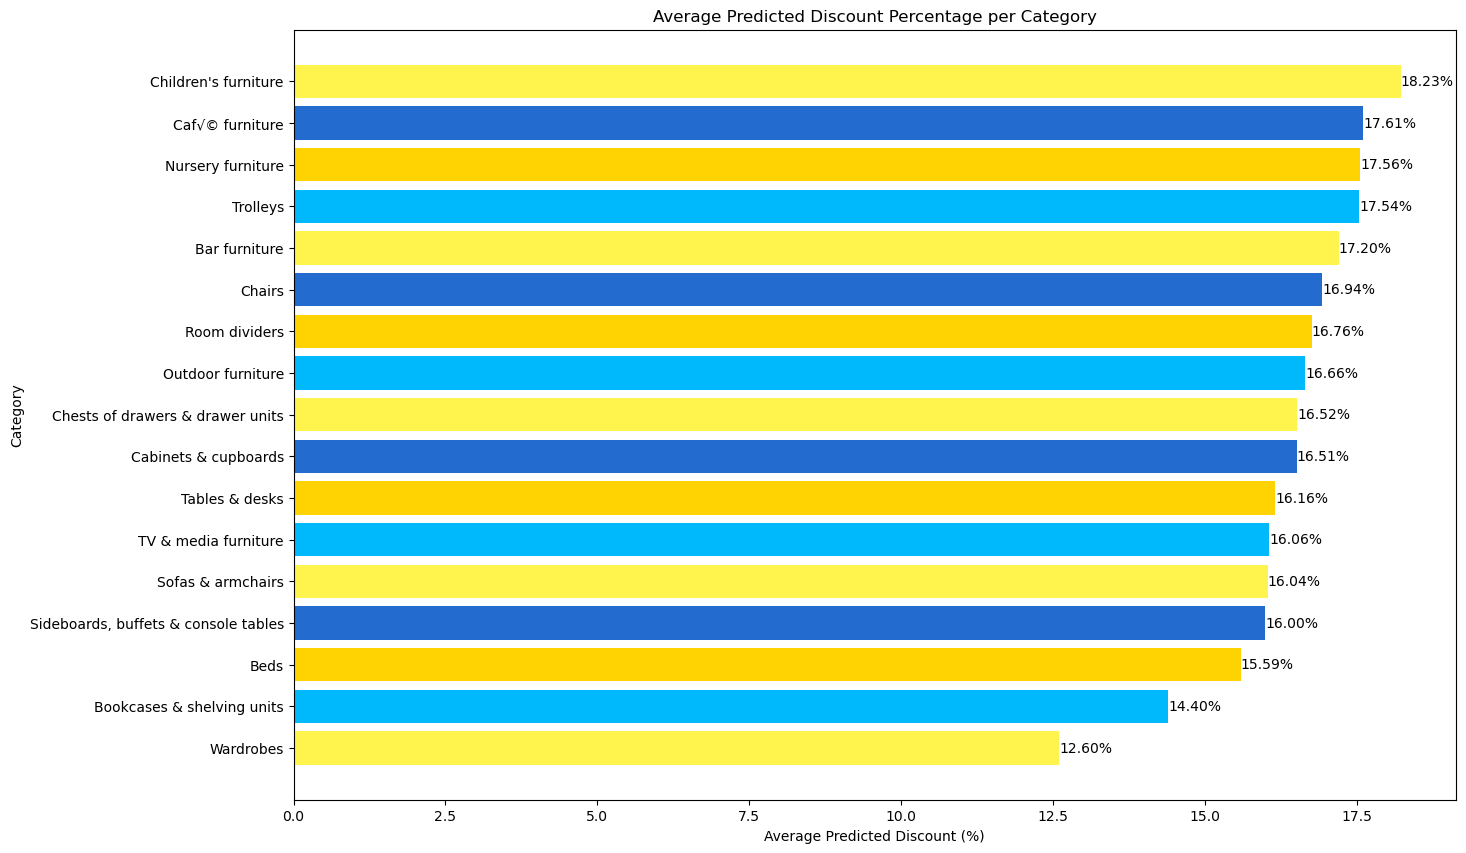

In [54]:
import matplotlib.pyplot as plt

# Sort categories by average discount (optional for clearer visualization)
discount_per_category = discount_per_category.sort_values(by='Average Predicted Discount', ascending=False)

# Define the color theme and cycle through it for each bar
colors = ['#FFF44E', '#246BCF', '#FFD301', '#00B9FC'] * (len(discount_per_category) // 4 + 1)

# Plot the bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(discount_per_category['Category'], discount_per_category['Average Predicted Discount'], color=colors[:len(discount_per_category)])
plt.xlabel('Average Predicted Discount (%)')
plt.ylabel('Category')
plt.title('Average Predicted Discount Percentage per Category')

# Add labels to each bar to show the exact discount percentage
for index, value in enumerate(discount_per_category['Average Predicted Discount']):
    plt.text(value, index, f"{value:.2f}%", va='center')  # Format to 2 decimal places

plt.gca().invert_yaxis()  # Optional: Invert y-axis to have highest discount at the top
plt.show()



Based on the Average Predicted Discount Percentage per Category chart, here are some insights and how they could help IKEA make strategic pricing and discounting decisions:

Insights from the Chart
Top Discounted Categories:

Children's Furniture has the highest average predicted discount at 18.16%, followed by Café Furniture (17.62%) and Nursery Furniture (17.49%).
This suggests that these categories may have higher discounts to attract customers, potentially due to high competition or lower demand.
Moderately Discounted Categories:

Categories like TV & Media Furniture (16.01%), Sofas & Armchairs (15.98%), and Sideboards, Buffets & Console Tables (15.92%) have moderate discount percentages. These items may have steady demand but still require some discounting to remain competitive.
Lowest Discounted Categories:

Wardrobes (12.68%) and Bookcases & Shelving Units (14.30%) have the lowest average discounts.
Lower discounting in these categories suggests strong or stable demand, allowing IKEA to maintain higher prices with minimal discounting.
Strategic Recommendations for IKEA
Adjust Discounts by Demand:

For categories with higher discounts, such as Children's Furniture and Café Furniture, IKEA might evaluate if these discounts are sustainable or if they can increase perceived value through product features or marketing rather than heavy discounting.
For high-demand categories with lower discounts, like Wardrobes and Bookcases & Shelving Units, IKEA could consider minimal or seasonal discounts to maintain profitability.
Inventory Management:

Categories with consistently high discounts may indicate surplus inventory or slower-moving items. IKEA could use this data to adjust inventory levels, ensuring they produce or stock these items in quantities that align with demand.
Targeted Marketing Campaigns:

IKEA could focus marketing efforts on categories with lower demand and higher discounts (e.g., Children's Furniture), using promotions to increase sales.
Alternatively, they could promote popular categories with lower discounts (e.g., Wardrobes) by emphasizing quality and durability rather than discounting, enhancing brand value.
Category-Specific Pricing Strategies:

For high-discount categories, IKEA might explore differentiated pricing strategies, such as offering budget versions with fewer features or premium versions with additional features to attract different customer segments without excessive discounting.
This approach allows IKEA to meet various customer needs without compromising on margins.
Conclusion
By analyzing average discounts across categories, IKEA can make more informed decisions about pricing, inventory, and promotions. This data-driven approach helps optimize discount strategies, ensuring that discounts are used effectively to drive demand where needed while maintaining profitability in high-demand categories.

# Category-Specific Theme Analysis Sub-Question | **What themes in product descriptions, within each category, are associated with a prolonged product lifecycle?**


For the code on the Theme Identification with NLP - Topic Modeling with Latent Dirichlet Allocation (LDA), it's in this [Google Colab notebook](https://colab.research.google.com/drive/1znG7-bQQgrIqsHz5XSXiXRxMyWtXVUJ8#scrollTo=hKh9nQ5_MM6n).



In [57]:
# Copying the original DataFrame to a new DataFrame
theme_df = df.copy()

theme_df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,discount_amount,discount_percentage,sub_category,category_encoded,designer_encoded,sub_category_encoded,other_colors_encoded,current_status_encoded,sellable_online_encoded,description_missing
0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,...,0.0,0.0,Bar table,0.012723,0.002978,0.004873,0,0,0,1
1,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,...,0.0,0.0,Bar stool with backrest,0.012723,0.018950,0.009475,1,0,0,1
2,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,...,118.0,40.0,Bar stool with backrest,0.012723,0.002978,0.009475,0,0,0,1
3,400550,EKEDALEN,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,...,0.0,0.0,Bar stool with backrest,0.012723,0.043584,0.009475,0,0,0,1
4,40426138,HENRIKSDAL,Bar furniture,395.0,0.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,...,0.0,0.0,Bar stool with backrest frame,0.012723,0.001354,0.000541,0,0,0,1


/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/2045526592.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/2045526592.py:16: UserWarning: 
The palette list has fewer values (4) than needed (17) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(


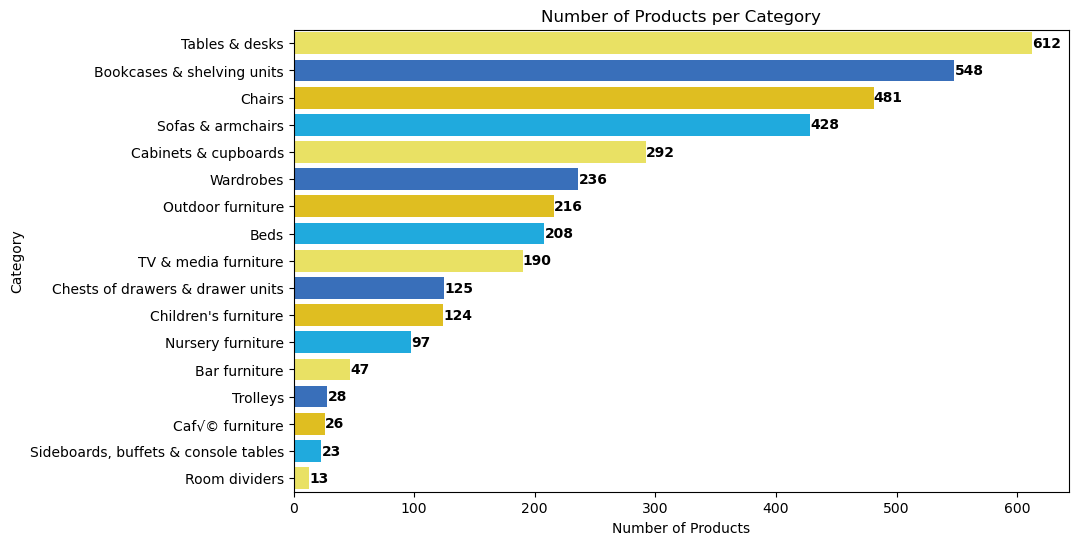

In [58]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `theme_df` is your dataframe and it contains 'category' and 'name' columns

# Calculate counts of products per category
category_counts = theme_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Define the color palette
color_palette = ['#FFF44E', '#246BCF', '#FFD301', '#00B9FC']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x='count',
    y='category',
    data=category_counts,
    palette=color_palette
)

# Add actual count labels to each bar
for index, value in enumerate(category_counts['count']):
    bars.text(value + 0.2, index, str(value), va='center', ha='left', color='black', fontweight='bold')

# Set plot title and axis labels
plt.title('Number of Products per Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')

# Display the plot
plt.show()


# Impute -1 with the Most Common Theme per Category: Replace -1 with the most common (or median) topic within each category.

In [60]:
# Step 1: Calculate the most common theme per category
most_common_themes = theme_df[theme_df['topic_group'] != -1].groupby('category_encoded')['topic_group'].agg(lambda x: x.mode()[0])

# Step 2: Replace -1 in 'topic_group' with the most common theme per category
theme_df['topic_group'] = theme_df.apply(
    lambda row: most_common_themes[row['category_encoded']] if row['topic_group'] == -1 else row['topic_group'], axis=1
)


In [61]:
for column in df.columns:
    unique_values = theme_df['topic_group'].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'item_id': [2. 0. 1.]
Unique values in 'name': [2. 0. 1.]
Unique values in 'category': [2. 0. 1.]
Unique values in 'price': [2. 0. 1.]
Unique values in 'old_price': [2. 0. 1.]
Unique values in 'sellable_online': [2. 0. 1.]
Unique values in 'link': [2. 0. 1.]
Unique values in 'other_colors': [2. 0. 1.]
Unique values in 'short_description': [2. 0. 1.]
Unique values in 'designer': [2. 0. 1.]
Unique values in 'depth': [2. 0. 1.]
Unique values in 'height': [2. 0. 1.]
Unique values in 'width': [2. 0. 1.]
Unique values in 'product_description': [2. 0. 1.]
Unique values in 'current_status': [2. 0. 1.]
Unique values in 'kewords': [2. 0. 1.]
Unique values in 'topic_group': [2. 0. 1.]
Unique values in 'topic_desc': [2. 0. 1.]
Unique values in 'discount_amount': [2. 0. 1.]
Unique values in 'discount_percentage': [2. 0. 1.]
Unique values in 'sub_category': [2. 0. 1.]
Unique values in 'category_encoded': [2. 0. 1.]
Unique values in 'designer_encoded': [2. 0. 1.]
Unique values in 'su

# Random Forest Classification

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Assuming `theme_df` is your DataFrame with:
# - 'current_status_encoded' (0 = discontinued, 1 = still available)
# - 'category_encoded' (encoded by frequency method)
# - 'topic_group' (theme or topic we want to optimize)

# Step 1: Define X (predictors) and y (target)
# Target variable: 'current_status_encoded' (indicating product lifecycle status)
y = theme_df['current_status_encoded']

# Predictors: 'category_encoded', 'topic_group', plus any additional relevant features
predictor_columns = ['category_encoded', 'topic_group', 'price', 'sellable_online_encoded', 'discount_percentage', 'depth', 'height', 'width']
X = pd.get_dummies(theme_df[predictor_columns], columns=['topic_group'], drop_first=True)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest Model to Predict `current_status_encoded`
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation (optional step)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Step 4: Determine Best `topic_group` for Each `category` to Maximize `current_status = 1`

# Get unique categories and topic groups
categories = theme_df['category_encoded'].unique()
topic_groups = theme_df['topic_group'].unique()

# Dictionary to store best topic_group for each category
best_topic_per_category = {}

# Loop over each category to find the best topic_group
for category in categories:
    max_prob = 0
    best_topic = None

    # Loop over each topic_group and simulate the current_status likelihood
    for topic in topic_groups:
        # Create a row template with the current category and topic group
        row = theme_df.loc[theme_df['category_encoded'] == category].iloc[0:1].copy()  # Template row for simulation
        row['category_encoded'] = category
        row['topic_group'] = topic  # Set the topic group to the one we're testing

        # Apply one-hot encoding to match training data structure
        row_encoded = pd.get_dummies(row[predictor_columns], columns=['topic_group'], drop_first=True)

        # Align row columns with training data columns (fill missing with 0)
        row_encoded = row_encoded.reindex(columns=X.columns, fill_value=0)

        # Predict the probability of current_status = 1
        prob_active = rf_model.predict_proba(row_encoded)[:, 1][0]  # Probability of being active

        # Check if this topic group gives a higher probability of prolonging lifecycle
        if prob_active > max_prob:
            max_prob = prob_active
            best_topic = topic

    # Store the best topic for this category
    best_topic_per_category[category] = best_topic

# Step 5: Assign the Best `topic_group` to Each Row in the DataFrame

# Map the best topic group to each row based on category
theme_df['predicted_best_topic_group'] = theme_df['category_encoded'].map(best_topic_per_category)

# Display the DataFrame with the newly assigned best topics
print(theme_df[['category', 'topic_group', 'predicted_best_topic_group', 'current_status_encoded']].head())


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       488
           1       0.78      0.71      0.74       251

    accuracy                           0.83       739
   macro avg       0.82      0.80      0.81       739
weighted avg       0.83      0.83      0.83       739

        category  topic_group  predicted_best_topic_group  \
0  Bar furniture          2.0                         2.0   
1  Bar furniture          2.0                         2.0   
2  Bar furniture          2.0                         2.0   
3  Bar furniture          2.0                         2.0   
4  Bar furniture          2.0                         2.0   

   current_status_encoded  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  


In [64]:
# Summarize the best topic group for each category
best_topic_summary = theme_df.groupby('category')['predicted_best_topic_group'].first().reset_index()

# Rename columns for clarity
best_topic_summary.columns = ['Category', 'Predicted Best Topic Group']
print()
# Print the summary
print("Summary of Categories and Their Predicted Best Topic Group to Prolong Product Lifecycle:")
print()
print(best_topic_summary)



Summary of Categories and Their Predicted Best Topic Group to Prolong Product Lifecycle:

                                Category  Predicted Best Topic Group
0                          Bar furniture                         2.0
1                                   Beds                         2.0
2             Bookcases & shelving units                         2.0
3                   Cabinets & cupboards                         2.0
4                        Caf√© furniture                         2.0
5                                 Chairs                         2.0
6       Chests of drawers & drawer units                         2.0
7                   Children's furniture                         2.0
8                      Nursery furniture                         2.0
9                      Outdoor furniture                         2.0
10                         Room dividers                         2.0
11  Sideboards, buffets & console tables                         2.0
12          

In [65]:
# Step 1: Create a mapping dictionary from `topic_group` to `topic_desc`
# Assuming `theme_df` has both `topic_group` (encoded) and `topic_desc` columns
topic_desc_mapping = theme_df[['topic_group', 'topic_desc']].drop_duplicates()
topic_dict = dict(zip(topic_desc_mapping['topic_group'], topic_desc_mapping['topic_desc']))

# Step 2: Summarize the best topic group per category
best_topic_summary = theme_df.groupby('category')['predicted_best_topic_group'].first().reset_index()

# Step 3: Convert best_topic_summary to a DataFrame (optional but ensures it's explicitly a DataFrame)
best_topic_summary = pd.DataFrame(best_topic_summary)

# Step 4: Map the encoded `predicted_best_topic_group` to `topic_desc` using the dictionary
best_topic_summary['Topic Description'] = best_topic_summary['predicted_best_topic_group'].map(topic_dict)

# Rename columns for clarity
best_topic_summary.columns = ['Category', 'Predicted Best Topic Group', 'Topic Description']

# Print the summary as a DataFrame
print("Summary of Categories and Their Predicted Best Topic Group to Prolong Product Lifecycle:")
print(best_topic_summary)

# Verify that best_topic_summary is a DataFrame
print("\nType of best_topic_summary:", type(best_topic_summary))


Summary of Categories and Their Predicted Best Topic Group to Prolong Product Lifecycle:
                                Category  Predicted Best Topic Group  \
0                          Bar furniture                         2.0   
1                                   Beds                         2.0   
2             Bookcases & shelving units                         2.0   
3                   Cabinets & cupboards                         2.0   
4                        Caf√© furniture                         2.0   
5                                 Chairs                         2.0   
6       Chests of drawers & drawer units                         2.0   
7                   Children's furniture                         2.0   
8                      Nursery furniture                         2.0   
9                      Outdoor furniture                         2.0   
10                         Room dividers                         2.0   
11  Sideboards, buffets & console tables       

In [66]:
import pandas as pd

# Step 1: Calculate the mean topic group per category, rounding to the nearest integer
mean_topic_group = theme_df.groupby('category')['topic_group'].mean().round().astype(int).reset_index()
mean_topic_group.columns = ['Category', 'Mean Topic Group']  # Rename for clarity

# Step 2: Merge with best_topic_summary to get the predicted best topic group for each category
comparison_df = pd.merge(best_topic_summary, mean_topic_group, on='Category', how='left')

# Step 3: Create a mapping dictionary from `topic_group` to `topic_desc`
topic_desc_mapping = theme_df[['topic_group', 'topic_desc']].drop_duplicates()
topic_dict = dict(zip(topic_desc_mapping['topic_group'], topic_desc_mapping['topic_desc']))

# Step 4: Map both `Mean Topic Group` and `Predicted Best Topic Group` to `topic_desc`
comparison_df['Mean Topic Group Description'] = comparison_df['Mean Topic Group'].map(topic_dict)
comparison_df['Predicted Best Topic Description'] = comparison_df['Predicted Best Topic Group'].map(topic_dict)

# Set Pandas to display all rows in Google Colab
pd.set_option('display.max_rows', None)

# Display the entire DataFrame (calling it directly works in Colab)
comparison_df[['Category', 'Mean Topic Group', 'Mean Topic Group Description',
               'Predicted Best Topic Group', 'Predicted Best Topic Description']]

,Category,Mean Topic Group,Mean Topic Group Description,Predicted Best Topic Group,Predicted Best Topic Description
0,Bar furniture,2,Durability and Appearance,2.0,Durability and Appearance
1,Beds,2,Durability and Appearance,2.0,Durability and Appearance
2,Bookcases & shelving units,0,"Color and Aesthetics, Usability",2.0,Durability and Appearance
3,Cabinets & cupboards,2,Durability and Appearance,2.0,Durability and Appearance
4,Caf√© furniture,0,"Color and Aesthetics, Usability",2.0,Durability and Appearance
5,Chairs,2,Durability and Appearance,2.0,Durability and Appearance
6,Chests of drawers & drawer units,2,Durability and Appearance,2.0,Durability and Appearance
7,Children's furniture,2,Durability and Appearance,2.0,Durability and Appearance
8,Nursery furniture,2,Durability and Appearance,2.0,Durability and Appearance
9,Outdoor furniture,1,Style and Functionality,2.0,Durability and Appearance


In [67]:
# Display the relevant columns to check for missing or identical values
print(comparison_df[['Category', 'Mean Topic Group Description', 'Predicted Best Topic Description']])


                                Category     Mean Topic Group Description  \
0                          Bar furniture        Durability and Appearance   
1                                   Beds        Durability and Appearance   
2             Bookcases & shelving units  Color and Aesthetics, Usability   
3                   Cabinets & cupboards        Durability and Appearance   
4                        Caf√© furniture  Color and Aesthetics, Usability   
5                                 Chairs        Durability and Appearance   
6       Chests of drawers & drawer units        Durability and Appearance   
7                   Children's furniture        Durability and Appearance   
8                      Nursery furniture        Durability and Appearance   
9                      Outdoor furniture          Style and Functionality   
10                         Room dividers  Color and Aesthetics, Usability   
11  Sideboards, buffets & console tables          Style and Functionality   

/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/284652798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mean Topic Group Description (Numeric)'] = filtered_df['Mean Topic Group Description'].map(description_mapping)
/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_82201/284652798.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Predicted Best Topic Description (Numeric)'] = filtered_df['Predicted Best Topic Description'].map(description_mapping)

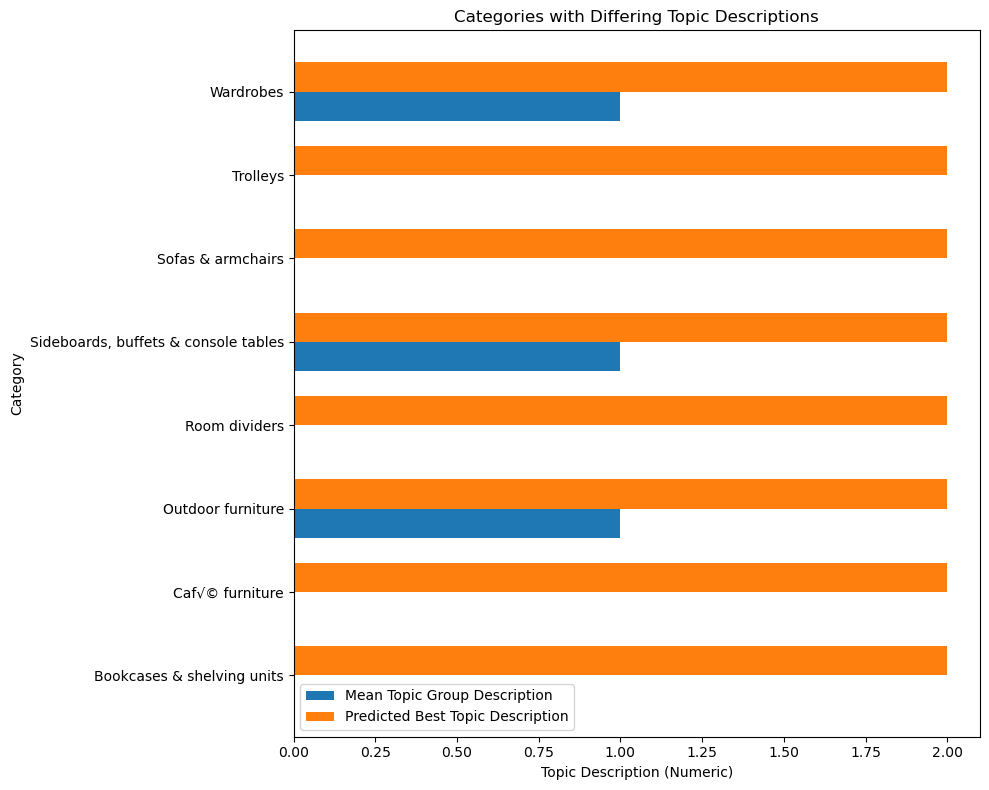

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Filter to keep only categories with different descriptions
filtered_df = comparison_df[comparison_df['Mean Topic Group Description'] != comparison_df['Predicted Best Topic Description']]

# Map unique descriptions to numeric values
description_mapping = {desc: i for i, desc in enumerate(pd.concat([filtered_df['Mean Topic Group Description'], filtered_df['Predicted Best Topic Description']]).unique())}
filtered_df['Mean Topic Group Description (Numeric)'] = filtered_df['Mean Topic Group Description'].map(description_mapping)
filtered_df['Predicted Best Topic Description (Numeric)'] = filtered_df['Predicted Best Topic Description'].map(description_mapping)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(len(filtered_df))
bar_height = 0.35  # Adjusted height for horizontal bars

# Plot bars horizontally
ax.barh(index - bar_height/2, filtered_df['Mean Topic Group Description (Numeric)'], bar_height, label='Mean Topic Group Description')
ax.barh(index + bar_height/2, filtered_df['Predicted Best Topic Description (Numeric)'], bar_height, label='Predicted Best Topic Description')

# Set y-axis to categories
ax.set_yticks(index)
ax.set_yticklabels(filtered_df['Category'])
ax.set_ylabel('Category')
ax.set_xlabel('Topic Description (Numeric)')
ax.set_title('Categories with Differing Topic Descriptions')
ax.legend()

plt.tight_layout()
plt.show()


This table provides valuable insights into optimal themes (topics) for various product categories at IKEA, focusing on which themes are associated with prolonged product availability (i.e., higher likelihood of remaining "active" in inventory). Here’s a breakdown of key insights and how this information can help IKEA with product lifecycle management and marketing strategies:

Insights
Dominance of "Durability and Appearance" Theme:

The "Durability and Appearance" theme is consistently identified as the best topic across most categories. It’s both the predicted best topic for maintaining product availability and aligns with the mean topic group in categories like Beds, Chairs, Cabinets & Cupboards, and Children's Furniture.
This suggests that customers are highly responsive to themes emphasizing durability and aesthetics, particularly for larger, frequently-used furniture.
Specialized Themes in Certain Categories:

Some categories, like Outdoor Furniture, Wardrobes, and Sideboards have "Style and Functionality" as the mean or predicted best topic. This indicates that customers in these categories might prioritize both the aesthetic appeal and functionality of the items.
"Color and Aesthetics, Usability" appears in categories such as Bookcases & Shelving Units, Room Dividers, and Café Furniture. For these product lines, usability and design elements like color and form may play a more significant role in customer decision-making.
Consistency Between Mean and Predicted Best Topic:

For many categories, the mean topic group aligns with the predicted best topic group. This consistency suggests that IKEA’s current themes are generally effective at aligning with what keeps products relevant and desirable to customers.
However, the prediction model validates these existing themes and identifies areas where focusing even more on specific themes could strengthen product longevity.
How This Can Help IKEA
Refined Content Strategy for Product Descriptions:

For categories like Beds, Chairs, and Cabinets, IKEA can emphasize "Durability and Appearance" in product descriptions, marketing materials, and imagery. Highlighting materials, construction quality, and visual appeal can reinforce the theme that resonates most with customers.
For categories where "Style and Functionality" or "Color and Aesthetics, Usability" are more relevant (e.g., Outdoor Furniture, Bookcases & Shelving Units), descriptions should focus on adaptability, design versatility, and style integration within various living spaces.
Targeted Marketing Campaigns:

IKEA can use these insights to create targeted campaigns that align with the top themes for each category. For example:
Outdoor Furniture campaigns could emphasize style flexibility, showcasing products in various settings to appeal to the "Style and Functionality" theme.
Café Furniture and Room Dividers might benefit from visuals and descriptions that emphasize usability and design elements like color schemes, catering to customers interested in decorative and adaptable furniture.
Product Development and Inventory Management:

Insights about which themes align best with product longevity can inform future product design and development decisions. If durability and appearance are crucial for most furniture categories, IKEA could prioritize high-quality materials, long-lasting finishes, and classic designs that are likely to stay relevant over time.
By reinforcing these themes in product lines where they matter most, IKEA can better manage inventory and lifecycle strategies, potentially reducing the need to discontinue or replace products frequently.
Enhanced In-Store and Online Experience:

The insights can be incorporated into in-store displays and online layouts. For instance, in-store signage for Beds and Chairs could emphasize durability aspects, while Outdoor Furniture sections could highlight versatile styling options.
Online filters and product recommendations could align with these insights, allowing customers to navigate products based on the most relevant themes (e.g., "Durability and Appearance" filter for certain categories).
Localized and Seasonal Campaigns:

IKEA can use these insights to adapt product positioning based on region and season. For example, Outdoor Furniture campaigns focusing on "Style and Functionality" could be highlighted in warmer months. Similarly, durability-focused campaigns for Children's Furniture might resonate more in regions with families who prioritize long-lasting, sturdy items.
Summary
By focusing on these insights, IKEA can create a more customer-centered product strategy that:

Enhances product appeal by emphasizing themes that resonate most with customers.
Extends the lifecycle of products, potentially reducing costs associated with discontinuation and restocking.
Supports targeted marketing efforts that align with the specific needs and preferences of customers in each product category.
Ultimately, these insights empower IKEA to position each product line more effectively in the market, leading to higher customer satisfaction, more efficient inventory management, and sustained product relevance.